In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("clean_merge_v2.xls", sep=";")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514797 entries, 0 to 1514796
Data columns (total 35 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1514797 non-null  int64  
 1   CalYear_compat_mobs                     1514797 non-null  int64  
 2   HourOfCall_compat_mobs                  1514797 non-null  int64  
 3   PerformanceReporting                    1514797 non-null  object 
 4   DateAndTimeMobilised                    1514797 non-null  object 
 5   DateAndTimeMobile                       1514797 non-null  object 
 6   DateAndTimeArrived                      1514797 non-null  object 
 7   TurnoutTimeSeconds                      1514797 non-null  float64
 8   TravelTimeSeconds                       1514797 non-null  float64
 9   AttendanceTimeSeconds                   1514797 non-null  float64
 10  DeployedFromStation_Name      

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df["AttendanceTimeSeconds"].describe()

count    1.514797e+06
mean     3.549788e+02
std      1.514282e+02
min      2.600000e+01
25%      2.540000e+02
50%      3.280000e+02
75%      4.230000e+02
max      1.200000e+03
Name: AttendanceTimeSeconds, dtype: float64

In [8]:
pd.set_option("display.max_columns", None)
df

,IncidentNumber,CalYear_compat_mobs,HourOfCall_compat_mobs,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Weekday_compat_mobs,Month_compat_mobs,Incident_Date,DateOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,Postcode_district,ProperCase,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),distance_km
0,235138081,2009,0,2,2009-01-01 00:02:00,2009-01-01 00:06:00,2009-01-01 00:08:00,253.0,89.0,342.0,Clapham,Home Station,2,not held up,Thursday,1,2009-01-01,2009-01-01,Special Service,RTC,Road Vehicle,In street close to gazetteer location,SW11,Wandsworth,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,60.0,255.0,1.691595
1,2091,2009,0,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:09:00,151.0,157.0,308.0,Edmonton,Home Station,1,not held up,Thursday,1,2009-01-01,2009-01-01,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N9,Enfield,Edmonton,308.0,Edmonton,-1.0,-1,1.0,1.0,1.0,60.0,255.0,0.639746
2,3091,2009,0,1,2009-01-01 00:04:00,2009-01-01 00:06:00,2009-01-01 00:08:00,108.0,102.0,210.0,Hillingdon,Home Station,1,not held up,Thursday,1,2009-01-01,2009-01-01,Fire,Secondary Fire,Outdoor,On land associated with building,UB10,Hillingdon,Hillingdon,210.0,Hillingdon,-1.0,-1,1.0,1.0,1.0,60.0,255.0,0.425043
3,5091,2009,0,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,114.0,119.0,233.0,Holloway,Home Station,1,not held up,Thursday,1,2009-01-01,2009-01-01,Fire,Secondary Fire,Outdoor,In street outside gazetteer location,N7,Islington,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,60.0,255.0,1.162546
4,6091,2009,0,1,2009-01-01 00:06:00,2009-01-01 00:07:00,2009-01-01 00:09:00,83.0,89.0,172.0,Kentish Town,Home Station,1,not held up,Thursday,1,2009-01-01,2009-01-01,False Alarm,AFA,Dwelling,Correct incident location,NW5,Camden,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2.0,60.0,255.0,0.563928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514792,20324029112024,2024,23,2,2024-11-29 23:28:00,2024-11-29 23:30:00,2024-11-29 23:36:00,110.0,379.0,489.0,Southall,Home Station,2,Not held up,Friday,11,2024-11-29,2024-11-29,False Alarm,AFA,Dwelling,Correct incident location,W7,Ealing,Ealing,401.0,Ealing,489.0,Southall,2.0,2.0,2.0,60.0,430.0,1.682129
1514793,20324129112024,2024,23,1,2024-11-29 23:29:00,2024-11-29 23:30:00,2024-11-29 23:34:00,69.0,246.0,315.0,West Norwood,Home Station,1,not held up,Friday,11,2024-11-29,2024-11-29,Special Service,Assist other agencies,Dwelling,Within same building,SE27,Lambeth,West Norwood,315.0,West Norwood,-1.0,-1,1.0,1.0,1.0,60.0,430.0,0.819945
1514794,20324229112024,2024,23,1,2024-11-29 23:31:00,2024-11-29 23:33:00,2024-11-29 23:37:00,80.0,251.0,331.0,Lambeth,Home Station,1,not held up,Friday,11,2024-11-29,2024-11-29,False Alarm,AFA,Dwelling,Correct incident location,SE17,Southwark,Lambeth,331.0,Lambeth,340.0,Lambeth,1.0,2.0,2.0,60.0,430.0,1.458296
1514795,20324229112024,2024,23,2,2024-11-29 23:31:00,2024-11-29 23:33:00,2024-11-29 23:37:00,101.0,239.0,340.0,Lambeth,Home Station,2,"Traffic, roadworks, etc",Friday,11,2024-11-29,2024-11-29,False Alarm,AFA,Dwelling,Correct incident location,SE17,Southwark,Lambeth,331.0,Lambeth,340.0,Lambeth,1.0,2.0,2.0,60.0,430.0,1.458296


In [9]:
y = df["AttendanceTimeSeconds"]
X = df.drop(columns=["AttendanceTimeSeconds", "IncidentNumber", "DateAndTimeMobilised", "DateAndTimeMobile", "DateAndTimeArrived", "TurnoutTimeSeconds",
                     "TravelTimeSeconds", "Incident_Date", "DateOfCall", "FirstPumpArriving_AttendanceTime", 
                     "FirstPumpArriving_DeployedFromStation", "SecondPumpArriving_AttendanceTime", "SecondPumpArriving_DeployedFromStation", 
                     "Notional Cost (£)", "IncidentGroup"]) 

In [10]:
X

,CalYear_compat_mobs,HourOfCall_compat_mobs,PerformanceReporting,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCode_Description,Weekday_compat_mobs,Month_compat_mobs,StopCodeDescription,PropertyCategory,AddressQualifier,Postcode_district,ProperCase,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,distance_km
0,2009,0,2,Clapham,Home Station,2,not held up,Thursday,1,RTC,Road Vehicle,In street close to gazetteer location,SW11,Wandsworth,Battersea,2.0,2.0,2.0,60.0,1.691595
1,2009,0,1,Edmonton,Home Station,1,not held up,Thursday,1,Secondary Fire,Outdoor,In street outside gazetteer location,N9,Enfield,Edmonton,1.0,1.0,1.0,60.0,0.639746
2,2009,0,1,Hillingdon,Home Station,1,not held up,Thursday,1,Secondary Fire,Outdoor,On land associated with building,UB10,Hillingdon,Hillingdon,1.0,1.0,1.0,60.0,0.425043
3,2009,0,1,Holloway,Home Station,1,not held up,Thursday,1,Secondary Fire,Outdoor,In street outside gazetteer location,N7,Islington,Holloway,1.0,2.0,2.0,60.0,1.162546
4,2009,0,1,Kentish Town,Home Station,1,not held up,Thursday,1,AFA,Dwelling,Correct incident location,NW5,Camden,Kentish Town,1.0,2.0,2.0,60.0,0.563928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514792,2024,23,2,Southall,Home Station,2,Not held up,Friday,11,AFA,Dwelling,Correct incident location,W7,Ealing,Ealing,2.0,2.0,2.0,60.0,1.682129
1514793,2024,23,1,West Norwood,Home Station,1,not held up,Friday,11,Assist other agencies,Dwelling,Within same building,SE27,Lambeth,West Norwood,1.0,1.0,1.0,60.0,0.819945
1514794,2024,23,1,Lambeth,Home Station,1,not held up,Friday,11,AFA,Dwelling,Correct incident location,SE17,Southwark,Lambeth,1.0,2.0,2.0,60.0,1.458296
1514795,2024,23,2,Lambeth,Home Station,2,"Traffic, roadworks, etc",Friday,11,AFA,Dwelling,Correct incident location,SE17,Southwark,Lambeth,1.0,2.0,2.0,60.0,1.458296


In [11]:
#df["DeployedFromStation_Name"].value_counts(normalize=True)
#df["DeployedFromLocation"].value_counts(normalize=True

#df.groupby("DeployedFromLocation")["DeployedFromStation_Name"].nunique()
df.groupby("DeployedFromStation_Name")["DeployedFromLocation"].nunique().value_counts()
#the overwhelming majority of stations may be Home Station and also other station


DeployedFromLocation
2    112
1      4
Name: count, dtype: int64

In [12]:
df.groupby("IncidentGroup")["StopCodeDescription"].value_counts()
df.groupby("StopCodeDescription")["IncidentGroup"].value_counts()
#IncidentGroup is subcategory of StopCodeDescription

StopCodeDescription              IncidentGroup  
AFA                              False Alarm        676303
Advice Only                      Special Service      6633
Animal assistance incidents      Special Service      6525
Assist other agencies            Special Service     15036
Chimney Fire                     Fire                  495
Effecting entry/exit             Special Service     72283
Evacuation (no fire)             Special Service      3300
False alarm - Good intent        False Alarm        192474
False alarm - Malicious          False Alarm         23016
Flooding                         Special Service     64047
Hazardous Materials incident     Special Service      9026
Late Call                        Fire                   97
Lift Release                     Special Service     20419
Making Safe (not RTC)            Special Service     11576
Medical Incident                 Special Service      5131
Medical Incident - Co-responder  Special Service      1296
No acti

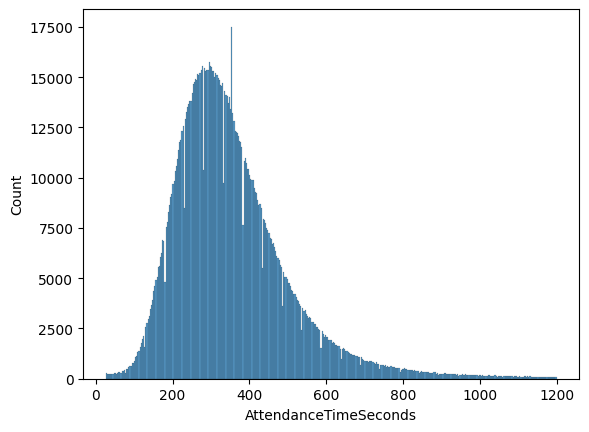

In [13]:
sns.histplot(y);


In [14]:
display(y.min())
for i in range (1,11):
    display(y.quantile(i/1000))
display(y.quantile(0.02))
display(y.quantile(0.03))
display(y.quantile(0.04))
#low attendence times (min: 26 sec) seem to be real. Both the quantiles and the histogram look natural

np.float64(26.0)

np.float64(43.0)

np.float64(60.0)

np.float64(73.0)

np.float64(83.0)

np.float64(91.0)

np.float64(97.0)

np.float64(103.0)

np.float64(107.0)

np.float64(111.0)

np.float64(114.0)

np.float64(135.0)

np.float64(148.0)

np.float64(158.0)

In [15]:
for i in range (1,11):
    display(y.quantile(i/10000))

np.float64(27.0)

np.float64(29.0)

np.float64(31.0)

np.float64(32.0)

np.float64(34.0)

np.float64(36.0)

np.float64(38.0)

np.float64(40.0)

np.float64(41.0)

np.float64(43.0)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514797 entries, 0 to 1514796
Data columns (total 20 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CalYear_compat_mobs            1514797 non-null  int64  
 1   HourOfCall_compat_mobs         1514797 non-null  int64  
 2   PerformanceReporting           1514797 non-null  object 
 3   DeployedFromStation_Name       1514797 non-null  object 
 4   DeployedFromLocation           1514797 non-null  object 
 5   PumpOrder                      1514797 non-null  int64  
 6   DelayCode_Description          1514797 non-null  object 
 7   Weekday_compat_mobs            1514797 non-null  object 
 8   Month_compat_mobs              1514797 non-null  int64  
 9   StopCodeDescription            1514797 non-null  object 
 10  PropertyCategory               1514797 non-null  object 
 11  AddressQualifier               1514797 non-null  object 
 12  Postcode_distr

In [17]:
display(X["PerformanceReporting"].nunique())
display(X["DeployedFromStation_Name"].nunique())
display(X["DeployedFromLocation"].nunique())
display(X["DelayCode_Description"].nunique())
display(X["StopCodeDescription"].nunique())
display(X["PropertyCategory"].nunique())
display(X["AddressQualifier"].nunique())
display(X["Postcode_district"].nunique())
display(X["ProperCase"].nunique())
display(X["IncidentStationGround"].nunique())
#less then or equal 12 values: OneHotEncoding
#otherwise: frequency encoding

3

116

2

12

28

9

11

317

33

102

In [18]:
def encode(df):   #One-Hot Encoding if .nunique() <= 12, else, frequency encoding
    dfc = df.copy()  
    cat_columns = dfc.select_dtypes(include=['object']).columns
    one_hot_encoded = []  # Track columns for One-Hot Encoding

    for col in cat_columns:
        unique = dfc[col].nunique()
        
        if unique <= 12:
            # One-Hot Encoding (forcing 0/1 instead of True/False)
            dfc = pd.get_dummies(dfc, columns=[col], prefix=col, dtype=int)
            one_hot_encoded.append(col)  # Mark this column for removal
        else:
            # Frequency Encoding
            freq_map = dfc[col].value_counts(normalize=True).to_dict()
            dfc[col] = dfc[col].map(freq_map)

    # Drop only the original columns that were one-hot encoded
    dfc.drop(columns=one_hot_encoded, inplace=True, errors='ignore')

    return dfc

In [19]:
X_encoded = encode(X)

In [20]:
X_encoded

,CalYear_compat_mobs,HourOfCall_compat_mobs,DeployedFromStation_Name,PumpOrder,Month_compat_mobs,StopCodeDescription,Postcode_district,ProperCase,IncidentStationGround,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,distance_km,PerformanceReporting_1,PerformanceReporting_2,PerformanceReporting_Not Used,DeployedFromLocation_Home Station,DeployedFromLocation_Other Station,DelayCode_Description_Address incomplete/wrong,DelayCode_Description_Address_incomplete/wrong,DelayCode_Description_Appliance/Equipment defect,DelayCode_Description_Arrived but held up - Other reason,DelayCode_Description_At drills when mobilised,DelayCode_Description_Mob/Radio problems when mobilised,DelayCode_Description_Not held up,DelayCode_Description_On outside duty when mobilised,DelayCode_Description_Traffic calming measures,"DelayCode_Description_Traffic, roadworks, etc",DelayCode_Description_Weather conditions,DelayCode_Description_not held up,Weekday_compat_mobs_Friday,Weekday_compat_mobs_Monday,Weekday_compat_mobs_Saturday,Weekday_compat_mobs_Sunday,Weekday_compat_mobs_Thursday,Weekday_compat_mobs_Tuesday,Weekday_compat_mobs_Wednesday,PropertyCategory_Aircraft,PropertyCategory_Boat,PropertyCategory_Dwelling,PropertyCategory_Non Residential,PropertyCategory_Other Residential,PropertyCategory_Outdoor,PropertyCategory_Outdoor Structure,PropertyCategory_Rail Vehicle,PropertyCategory_Road Vehicle,AddressQualifier_Correct incident location,AddressQualifier_In street close to gazetteer location,AddressQualifier_In street outside gazetteer location,AddressQualifier_In street remote from gazetteer location,AddressQualifier_Nearby address - no building in street,AddressQualifier_Nearby address - street not listed in gazetteer,AddressQualifier_On land associated with building,AddressQualifier_On motorway / elevated road,AddressQualifier_Open land/water - nearest gazetteer location,AddressQualifier_Railway land or rolling stock,AddressQualifier_Within same building
0,2009,0,0.010037,2,1,0.036991,0.009080,0.033752,0.008562,2.0,2.0,2.0,60.0,1.691595,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,2009,0,0.011193,1,1,0.070277,0.005213,0.028938,0.011889,1.0,1.0,1.0,60.0,0.639746,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2009,0,0.009930,1,1,0.070277,0.002425,0.032239,0.009477,1.0,1.0,1.0,60.0,0.425043,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2009,0,0.011176,1,1,0.070277,0.007462,0.031730,0.012184,1.0,2.0,2.0,60.0,1.162546,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2009,0,0.017569,1,1,0.446464,0.003932,0.050151,0.016787,1.0,2.0,2.0,60.0,0.563928,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514792,2024,23,0.011196,2,11,0.446464,0.002412,0.033300,0.009669,2.0,2.0,2.0,60.0,1.682129,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1514793,2024,23,0.012495,1,11,0.009926,0.002805,0.043056,0.011998,1.0,1.0,1.0,60.0,0.819945,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1514794,2024,23,0.019620,1,11,0.446464,0.004886,0.045866,0.021189,1.0,2.0,2.0,60.0,1.458296,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1514795,2024,23,0.019620,2,11,0.446464,0.004886,0.045866,0.021189,1.0,2.0,2.0,60.0,1.458296,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=5795)

In [22]:
X_train.isna().sum().sum()+X_test.isna().sum().sum()+y_train.isna().sum().sum()+y_test.isna().sum().sum() 
#result 0, as it should be

np.int64(0)

In [23]:
scal = StandardScaler()
X_train_scaled = scal.fit_transform(X_train)
X_test_scaled = scal.transform(X_test)

In [24]:
mlp = MLPRegressor(hidden_layer_sizes=(10,5), max_iter=10, random_state=5795)

In [25]:
mlp.fit(X_train_scaled, y_train) #this takes ~1 minute

C:\Users\tomei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=10, random_state=5795)

In [26]:
y_pred_test = mlp.predict(X_test_scaled)
y_pred_train = mlp.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp.score(X_train_scaled, y_train))      
#no overfitting -- train and test sets have almost the same MAE/RMSE/R²
#this result does not appear in the report

test set:
Mean Absolute Error: 77.39101285864146
Root Mean Squared Error: 109.2539312071122
R²: 0.4803564154305371

 train set:
Mean Absolute Error: 77.29939891875105
Root Mean Squared Error: 109.0796513585648
R²: 0.48072351676795333


In [27]:
#THIS TAKES A WHILE TO EXECUTE. Expect 10-30 minutes.
params = {
    'solver': ['lbfgs', 'adam', 'sgd'],   # Different optimization algorithms
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(mlp, params, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

#note: I could always test more hyperparameter combinations, increase cv, increase hidden layers in mlp, but there's a limit in terms of time and memory


C:\Users\tomei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'logistic', 'alpha': 0.001, 'solver': 'sgd'}

In [29]:
#build a MLP model with these paramters.
#experiment with higher sizes.

mlp_big = MLPRegressor(hidden_layer_sizes=(10,10), activation='logistic', solver='sgd', alpha=0.001, max_iter=30, random_state=5795)
mlp_big.fit(X_train_scaled, y_train)

y_pred_test = mlp_big.predict(X_test_scaled)
y_pred_train = mlp_big.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp_big.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp_big.score(X_train_scaled, y_train))     


C:\Users\tomei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


test set:
Mean Absolute Error: 73.65815331908611
Root Mean Squared Error: 107.34819139541615
R²: 0.49832681522433375

 train set:
Mean Absolute Error: 73.6073435977439
Root Mean Squared Error: 107.13499663326859
R²: 0.49907363170172836


In [30]:
mlp_bigger = MLPRegressor(hidden_layer_sizes=(20,20), activation='logistic', solver='sgd', alpha=0.001, max_iter=100, random_state=5795)
mlp_bigger.fit(X_train_scaled, y_train)

y_pred_test = mlp_bigger.predict(X_test_scaled)
y_pred_train = mlp_bigger.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp_bigger.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp_bigger.score(X_train_scaled, y_train))     
#marginal improvement, but only marginal. 

#in the following, experiment with learning rate

test set:
Mean Absolute Error: 72.74139501368396
Root Mean Squared Error: 105.90135210220534
R²: 0.5117587888140933

 train set:
Mean Absolute Error: 72.6528774354304
Root Mean Squared Error: 105.6843880471358
R²: 0.5125468888725415


In [31]:
mlp_bigger_lr = MLPRegressor(hidden_layer_sizes=(20,20), activation='logistic', solver='sgd', alpha=0.001, max_iter=100, random_state=5795, learning_rate_init=0.005)
mlp_bigger_lr.fit(X_train_scaled, y_train)
#see if bigger learning rate gives better results

y_pred_test = mlp_bigger_lr.predict(X_test_scaled)
y_pred_train = mlp_bigger_lr.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp_bigger_lr.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp_bigger_lr.score(X_train_scaled, y_train))    

#higher learning rate makes it worse


test set:
Mean Absolute Error: 112.37077551729011
Root Mean Squared Error: 151.58654617503845
R²: -0.00035175876364546

 train set:
Mean Absolute Error: 112.28504850217965
Root Mean Squared Error: 151.39713879980962
R²: -0.0003374037715098144


In [32]:
#reduce learning rate while still making it higher then the default

mlp_bigger_lr2 = MLPRegressor(hidden_layer_sizes=(20,20), activation='logistic', solver='sgd', alpha=0.001, max_iter=100, random_state=5795, learning_rate_init=0.002)
mlp_bigger_lr2.fit(X_train_scaled, y_train)

y_pred_test = mlp_bigger_lr2.predict(X_test_scaled)
y_pred_train = mlp_bigger_lr2.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp_bigger_lr2.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp_bigger_lr2.score(X_train_scaled, y_train))    
#no better results compared to default learning rate

test set:
Mean Absolute Error: 73.83618928271429
Root Mean Squared Error: 107.32539856849492
R²: 0.4985398292676272

 train set:
Mean Absolute Error: 73.72726157679816
Root Mean Squared Error: 107.03897602019747
R²: 0.4999711479909519


In [34]:
#vice versa, test lower larning rate. Find the best hyperparamters using GridSearchCV


lr_def = 0.001 #default learning rate
mlp_lr_test = MLPRegressor(hidden_layer_sizes=(20,20), activation='logistic', solver='sgd', alpha=0.001, max_iter=100, random_state=5795)

params = {
'learning_rate_init': [lr_def, lr_def/3, lr_def/10, lr_def/30, lr_def/100, lr_def/300, lr_def/1000],
'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(mlp_lr_test, params, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

C:\Users\tomei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


{'learning_rate': 'constant', 'learning_rate_init': 1e-05}

In [35]:
#create MLP-model with corresponding hyperparamters

mlp_lower_lr = MLPRegressor(hidden_layer_sizes=(20,20), activation='logistic', solver='sgd', alpha=0.001, max_iter=100, random_state=5795, learning_rate_init=0.00001)
mlp_lower_lr.fit(X_train_scaled, y_train)

y_pred_test = mlp_lower_lr.predict(X_test_scaled)
y_pred_train = mlp_lower_lr.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("test set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("Root Mean Squared Error:", np.sqrt(mse_test))
print("R²:", mlp_lower_lr.score(X_test_scaled, y_test))
print("\n train set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Root Mean Squared Error:", np.sqrt(mse_train))
print("R²:", mlp_lower_lr.score(X_train_scaled, y_train)) 

C:\Users\tomei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


test set:
Mean Absolute Error: 68.62601655027319
Root Mean Squared Error: 101.09101571566922
R²: 0.5551060042670555

 train set:
Mean Absolute Error: 68.47847316897908
Root Mean Squared Error: 100.68343118762435
R²: 0.5575877054484346


In [36]:
#help(MLPRegressor)


In [37]:
########################################
############################################
##############################################
#This concludes the MLPRegressor. Now, let's do torch-based Deep Learing

#note: I'm aware I could have tried even more, but that which I tried already took several hours.


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbearer
from torchbearer import Trial
from torch.utils.data import TensorDataset, DataLoader

In [39]:
X_train.shape[1]

58

In [40]:
y_train.dtype

dtype('float64')

In [41]:
#note: every one of the following cells takes very long to execute

In [43]:
#  Convert Data to PyTorch Tensors
X_train_tens = torch.tensor(X_train_scaled.astype(np.float32), dtype=torch.float32)
X_test_tens = torch.tensor(X_test_scaled.astype(np.float32), dtype=torch.float32)
y_train_tens = torch.tensor(y_train.to_numpy().astype(np.float32), dtype=torch.float32).unsqueeze(1)
y_test_tens = torch.tensor(y_test.to_numpy().astype(np.float32), dtype=torch.float32).unsqueeze(1)

# Create corresponding datasets
train_dataset = TensorDataset(X_train_tens, y_train_tens)
test_dataset = TensorDataset(X_test_tens, y_test_tens)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [45]:
#initialise first model
model = nn.Sequential(
    nn.Linear(X_train_tens.shape[1], 5),  # Input layer
    nn.ReLU(),
    nn.Linear(5, 5),  # Hidden layer 
    nn.ReLU(),
    nn.Linear(5, 1)  # Output layer
)

# Define Loss Function & Optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Store Training History
train_mae, test_mae, train_rmse,  test_rmse, train_r2, test_r2 = [], [], [], [], [], [], 
epochs = 20

# Training Loop with Metric Calculation
for epoch in range(epochs):
    model.train()
    total_loss = 0
    y_train_pred = []
    y_train_true = []
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_batch = model(X_batch)
        loss = loss_fn(y_pred_batch, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        y_train_pred.extend(y_pred_batch.detach().numpy().flatten())
        y_train_true.extend(y_batch.numpy().flatten())

    # Compute Train Metrics
    train_mae.append(mean_absolute_error(y_train_true, y_train_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
    train_r2.append(r2_score(y_train_true, y_train_pred))

    # Evaluate on Test Set
    model.eval()
    y_test_pred = model(X_test_tens).detach().numpy().flatten()
    y_test_true = y_test.to_numpy().flatten()

    test_mae.append(mean_absolute_error(y_test_true, y_test_pred))
    test_rmse.append(np.sqrt(mean_squared_error(y_test_true, y_test_pred)))
    test_r2.append(r2_score(y_test_true, y_test_pred))

    print(f"Epoch {epoch+1}/{epochs}: Test Mean Average Error: {test_mae[-1]:.4f}, Train Mean Average Error: {train_mae[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test Root Mean Squared Error: {test_rmse[-1]:.4f}, Train Root Mean Square Error: {train_rmse[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test R²: {test_r2[-1]:.4f}, Train R²: {train_r2[-1]:.4f}")


Epoch 1/20: Test Mean Average Error: 78.6647, Train Mean Average Error: 86.4834
Epoch 1/20: Test Root Mean Squared Error: 110.9252, Train Root Mean Square Error: 124.8747
Epoch 1/20: Test R²: 0.4643, Train R²: 0.3194
Epoch 2/20: Test Mean Average Error: 77.4687, Train Mean Average Error: 78.2650
Epoch 2/20: Test Root Mean Squared Error: 110.3507, Train Root Mean Square Error: 110.4900
Epoch 2/20: Test R²: 0.4699, Train R²: 0.4672
Epoch 3/20: Test Mean Average Error: 78.3914, Train Mean Average Error: 77.9972
Epoch 3/20: Test Root Mean Squared Error: 110.1076, Train Root Mean Square Error: 110.1139
Epoch 3/20: Test R²: 0.4722, Train R²: 0.4708
Epoch 4/20: Test Mean Average Error: 77.8800, Train Mean Average Error: 77.8799
Epoch 4/20: Test Root Mean Squared Error: 109.9969, Train Root Mean Square Error: 109.9678
Epoch 4/20: Test R²: 0.4733, Train R²: 0.4722
Epoch 5/20: Test Mean Average Error: 77.6956, Train Mean Average Error: 77.7712
Epoch 5/20: Test Root Mean Squared Error: 109.7521, 

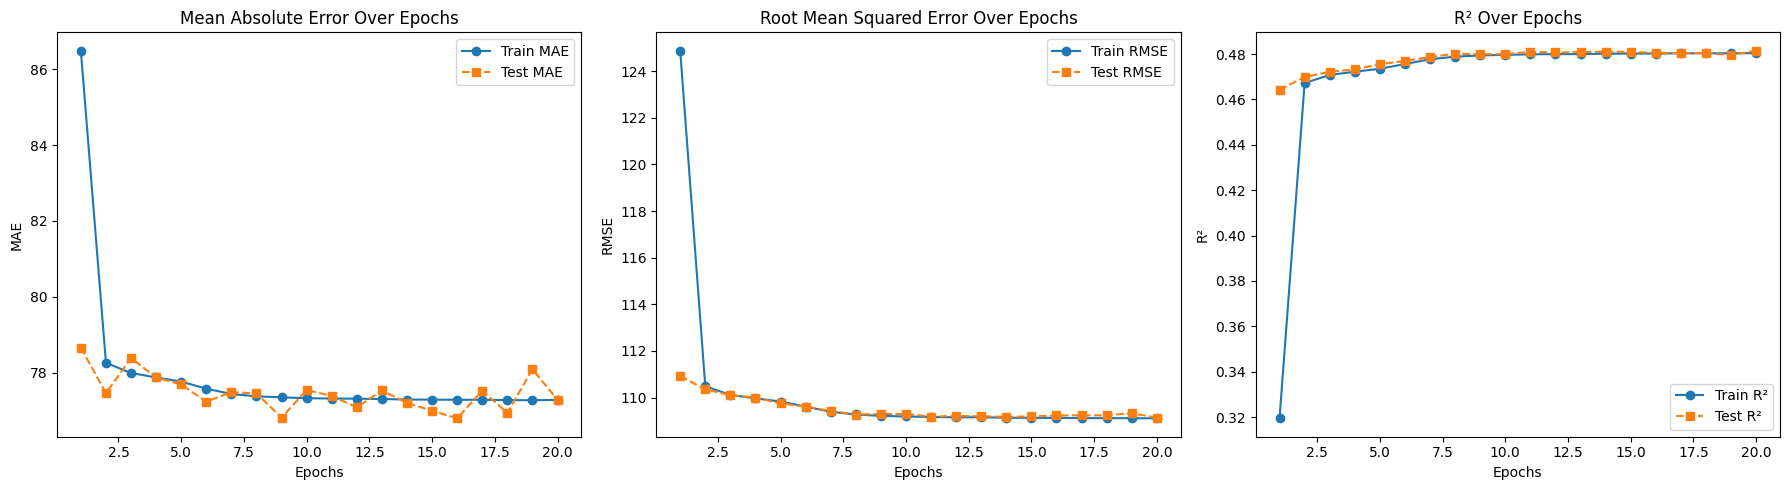

In [46]:
##plots

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].plot(range(1, 21), train_mae, marker='o', label='Train MAE', linestyle='-')
axes[0].plot(range(1, 21), test_mae, marker='s', label='Test MAE', linestyle='--')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].set_title('Mean Absolute Error Over Epochs')

# Plot RMSE
axes[1].plot(range(1, 21), train_rmse, marker='o', label='Train RMSE', linestyle='-')
axes[1].plot(range(1, 21), test_rmse, marker='s', label='Test RMSE', linestyle='--')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].set_title('Root Mean Squared Error Over Epochs')

# Plot R² 
axes[2].plot(range(1, 21), train_r2, marker='o', label='Train R²', linestyle='-')
axes[2].plot(range(1, 21), test_r2, marker='s', label='Test R²', linestyle='--')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R²')
axes[2].legend()
axes[2].set_title('R² Over Epochs')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [47]:
#initialise second model
model = nn.Sequential(
    nn.Linear(X_train_tens.shape[1], 200),  # Input layer
    nn.ReLU(),
    nn.Linear(200, 200),  # Hidden layer 1
    nn.ReLU(),
    nn.Linear(200, 200),  # Hidden layer 2
    nn.Linear(200, 1)  # Output layer
)

# Define Loss Function & Optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Store Training History
train_mae2, test_mae2, train_rmse2,  test_rmse2, train_r2_2, test_r2_2 = [], [], [], [], [], []
epochs = 10

# Training Loop with Metric Calculation
for epoch in range(epochs):
    model.train()
    total_loss = 0
    y_train_pred = []
    y_train_true = []
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_batch = model(X_batch)
        loss = loss_fn(y_pred_batch, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        y_train_pred.extend(y_pred_batch.detach().numpy().flatten())
        y_train_true.extend(y_batch.numpy().flatten())

    # Compute Train Metrics
    train_mae2.append(mean_absolute_error(y_train_true, y_train_pred))
    train_rmse2.append(np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
    train_r2_2.append(r2_score(y_train_true, y_train_pred))

    # Evaluate on Test Set
    model.eval()
    y_test_pred = model(X_test_tens).detach().numpy().flatten()
    y_test_true = y_test.to_numpy().flatten()

    test_mae2.append(mean_absolute_error(y_test_true, y_test_pred))
    test_rmse2.append(np.sqrt(mean_squared_error(y_test_true, y_test_pred)))
    test_r2_2.append(r2_score(y_test_true, y_test_pred))

    print(f"Epoch {epoch+1}/{epochs}: Test Mean Average Error: {test_mae2[-1]:.4f}, Train Mean Average Error: {train_mae2[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test Root Mean Squared Error: {test_rmse2[-1]:.4f}, Train Root Mean Square Error: {train_rmse2[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test R²: {test_r2_2[-1]:.4f}, Train R²: {train_r2_2[-1]:.4f}")




Epoch 1/10: Test Mean Average Error: 70.9590, Train Mean Average Error: 74.8833
Epoch 1/10: Test Root Mean Squared Error: 103.8810, Train Root Mean Square Error: 108.1615
Epoch 1/10: Test R²: 0.5302, Train R²: 0.4894
Epoch 2/10: Test Mean Average Error: 69.3559, Train Mean Average Error: 70.8326
Epoch 2/10: Test Root Mean Squared Error: 102.5711, Train Root Mean Square Error: 103.4140
Epoch 2/10: Test R²: 0.5420, Train R²: 0.5333
Epoch 3/10: Test Mean Average Error: 69.1950, Train Mean Average Error: 69.7081
Epoch 3/10: Test Root Mean Squared Error: 101.6434, Train Root Mean Square Error: 102.0936
Epoch 3/10: Test R²: 0.5502, Train R²: 0.5451
Epoch 4/10: Test Mean Average Error: 69.8708, Train Mean Average Error: 69.1112
Epoch 4/10: Test Root Mean Squared Error: 101.2262, Train Root Mean Square Error: 101.3941
Epoch 4/10: Test R²: 0.5539, Train R²: 0.5513
Epoch 5/10: Test Mean Average Error: 69.9029, Train Mean Average Error: 68.6846
Epoch 5/10: Test Root Mean Squared Error: 101.2110, 

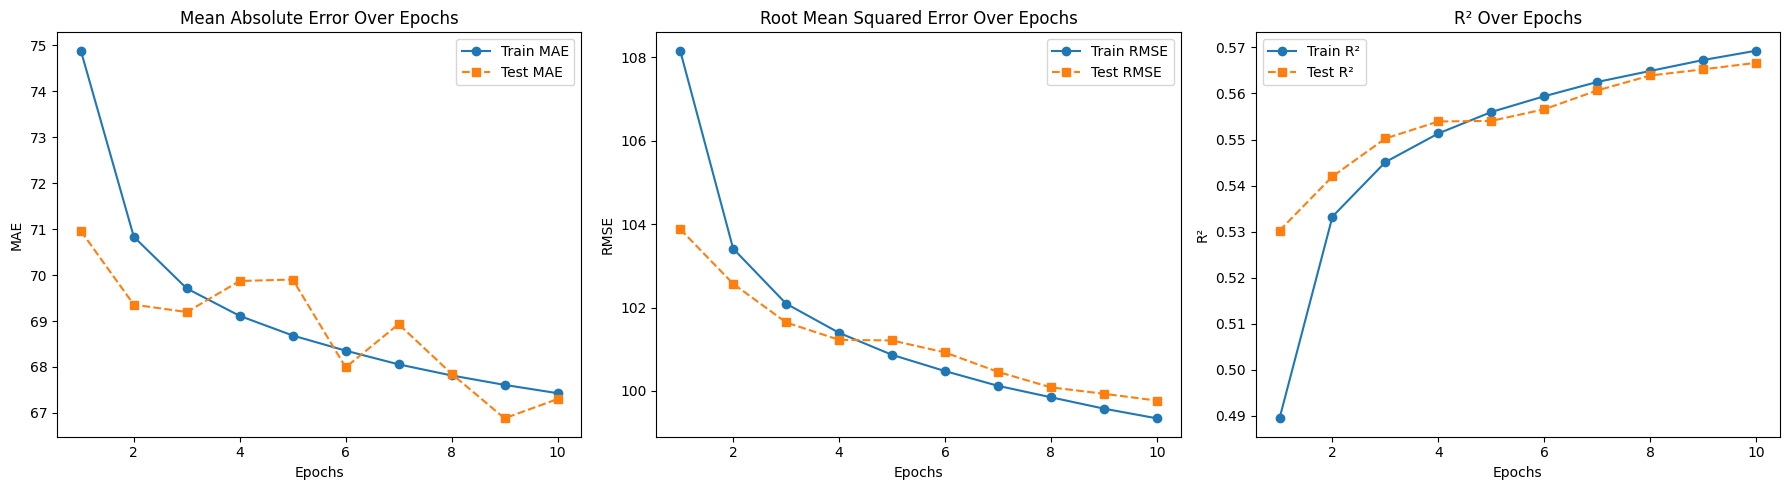

In [48]:
##plots

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].plot(range(1, 11), train_mae2, marker='o', label='Train MAE', linestyle='-')
axes[0].plot(range(1, 11), test_mae2, marker='s', label='Test MAE', linestyle='--')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].set_title('Mean Absolute Error Over Epochs')

# Plot RMSE
axes[1].plot(range(1, 11), train_rmse2, marker='o', label='Train RMSE', linestyle='-')
axes[1].plot(range(1, 11), test_rmse2, marker='s', label='Test RMSE', linestyle='--')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].set_title('Root Mean Squared Error Over Epochs')

# Plot R² Score
axes[2].plot(range(1, 11), train_r2_2, marker='o', label='Train R²', linestyle='-')
axes[2].plot(range(1, 11), test_r2_2, marker='s', label='Test R²', linestyle='--')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R²')
axes[2].legend()
axes[2].set_title('R² Over Epochs')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [49]:
#initialise 3rd model
model = nn.Sequential(
    nn.Linear(X_train_tens.shape[1], 500),  # Input layer
    nn.ReLU(),
    nn.Linear(500, 500),  # Hidden layer 1
    nn.ReLU(),
    nn.Linear(500, 500),  # Hidden layer 2
    nn.ReLU(),
    nn.Linear(500, 500),  # Hidden layer 3
    nn.ReLU(),
    nn.Linear(500, 1)  # Output layer
)

# Define Loss Function & Optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Store Training History
train_mae3, test_mae3, train_rmse3,  test_rmse3, train_r2_3, test_r2_3 = [], [], [], [], [], []
epochs = 10

# Training Loop with Metric Calculation
for epoch in range(epochs):
    model.train()
    total_loss = 0
    y_train_pred = []
    y_train_true = []
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_batch = model(X_batch)
        loss = loss_fn(y_pred_batch, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        y_train_pred.extend(y_pred_batch.detach().numpy().flatten())
        y_train_true.extend(y_batch.numpy().flatten())

    # Compute Train Metrics
    train_mae3.append(mean_absolute_error(y_train_true, y_train_pred))
    train_rmse3.append(np.sqrt(mean_squared_error(y_train_true, y_train_pred)))
    train_r2_3.append(r2_score(y_train_true, y_train_pred))

    # Evaluate on Test Set
    model.eval()
    y_test_pred = model(X_test_tens).detach().numpy().flatten()
    y_test_true = y_test.to_numpy().flatten()

    test_mae3.append(mean_absolute_error(y_test_true, y_test_pred))
    test_rmse3.append(np.sqrt(mean_squared_error(y_test_true, y_test_pred)))
    test_r2_3.append(r2_score(y_test_true, y_test_pred))

    print(f"Epoch {epoch+1}/{epochs}: Test Mean Average Error: {test_mae3[-1]:.4f}, Train Mean Average Error: {train_mae3[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test Root Mean Squared Error: {test_rmse3[-1]:.4f}, Train Root Mean Square Error: {train_rmse3[-1]:.4f}")
    print(f"Epoch {epoch+1}/{epochs}: Test R²: {test_r2_3[-1]:.4f}, Train R²: {train_r2_3[-1]:.4f}")


Epoch 1/10: Test Mean Average Error: 72.5430, Train Mean Average Error: 73.6888
Epoch 1/10: Test Root Mean Squared Error: 103.7772, Train Root Mean Square Error: 106.9084
Epoch 1/10: Test R²: 0.5311, Train R²: 0.5012
Epoch 2/10: Test Mean Average Error: 68.9206, Train Mean Average Error: 70.2925
Epoch 2/10: Test Root Mean Squared Error: 102.4766, Train Root Mean Square Error: 102.7993
Epoch 2/10: Test R²: 0.5428, Train R²: 0.5388
Epoch 3/10: Test Mean Average Error: 68.2965, Train Mean Average Error: 69.3316
Epoch 3/10: Test Root Mean Squared Error: 101.0134, Train Root Mean Square Error: 101.6865
Epoch 3/10: Test R²: 0.5558, Train R²: 0.5487
Epoch 4/10: Test Mean Average Error: 69.5835, Train Mean Average Error: 68.7059
Epoch 4/10: Test Root Mean Squared Error: 101.1358, Train Root Mean Square Error: 100.9525
Epoch 4/10: Test R²: 0.5547, Train R²: 0.5552
Epoch 5/10: Test Mean Average Error: 68.1394, Train Mean Average Error: 68.2720
Epoch 5/10: Test Root Mean Squared Error: 100.2669, 

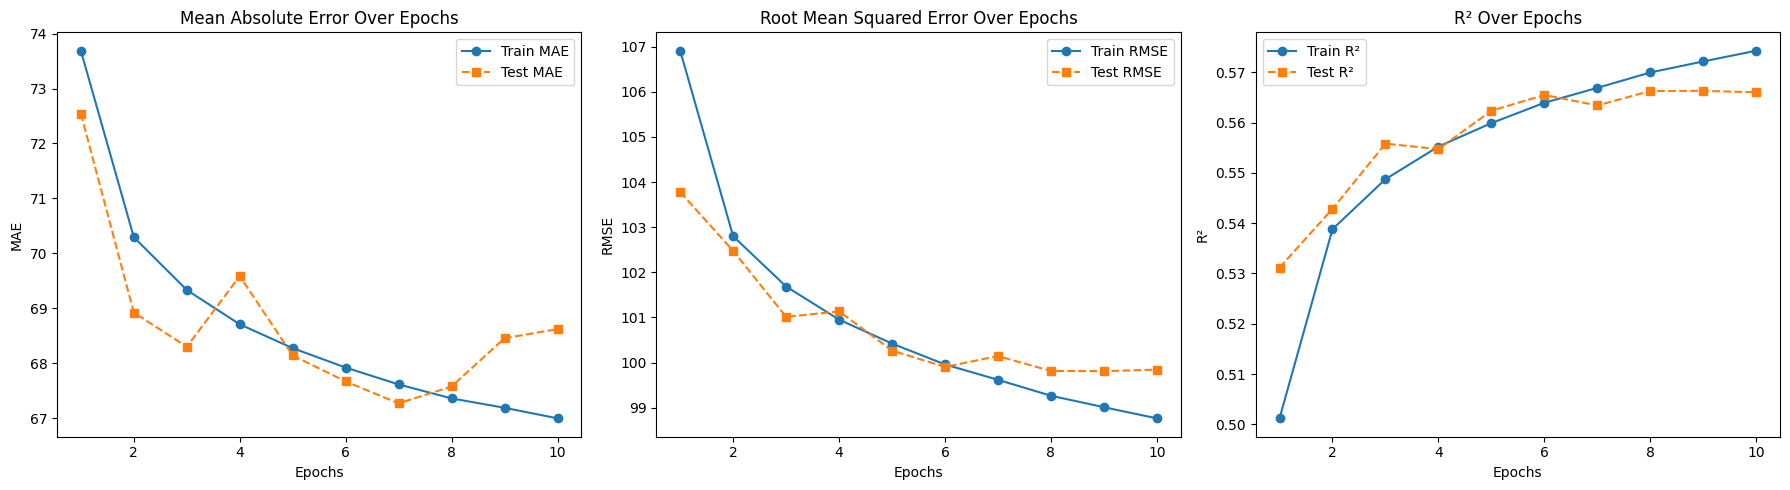

In [50]:
##plots

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].plot(range(1, 11), train_mae3, marker='o', label='Train MAE', linestyle='-')
axes[0].plot(range(1, 11), test_mae3, marker='s', label='Test MAE', linestyle='--')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].set_title('Mean Absolute Error Over Epochs')

# Plot RMSE
axes[1].plot(range(1, 11), train_rmse3, marker='o', label='Train RMSE', linestyle='-')
axes[1].plot(range(1, 11), test_rmse3, marker='s', label='Test RMSE', linestyle='--')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].set_title('Root Mean Squared Error Over Epochs')

# Plot R² Score
axes[2].plot(range(1, 11), train_r2_3, marker='o', label='Train R²', linestyle='-')
axes[2].plot(range(1, 11), test_r2_3, marker='s', label='Test R²', linestyle='--')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('R²')
axes[2].legend()
axes[2].set_title('R² Over Epochs')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()